### Question 1:  MNIST dataset (20)

This dataset consists of images of handwritten digits (0-9), and the task is to classify each image into the appropriate digit category. 

In [71]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
digits = datasets.load_digits()

# Split the data into features (X) and labels (y)
X = digits.data
y = digits.target

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

1. Split the data into training and testing data, each with 50% and use the random_state as 5220. Use the K = 5 in the KNN and print the accuracy. 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.5, random_state=5220)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
accuracy = knn_model.score(x_test, y_test)
print(accuracy)


0.9799777530589544


### Question 2:  KNN with regression (40)

Following is a simulation data with three features. 

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=3, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

1. Fit a KNN model. Tune the parameter of K and distance metric (Euclidean and Manhattan). Print the MSE with the best parameter. (20) 

In [74]:
# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Create the best KNN model with the tuned parameters
knn_best = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Mean Squared Error: 652.1642782709175


2. Plot and compare the true and predicted values. You can plot two figures, one with the first feature and y value, the other one with the second feature and y value. (15)

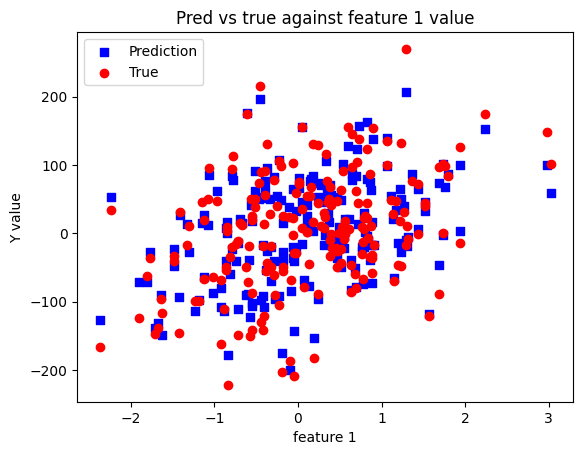

In [75]:
# x = range(min(X_test[:,1]-1,max(X_test[:,1])+1)
# y = range(min(y_pred-1,max(y_pred)+1)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_test[:,1], y_pred, c='b', marker="s", label='Prediction')
ax1.scatter(X_test[:,1],y_test, c='r', marker="o", label='True')
plt.legend(loc='upper left')
plt.xlabel('feature 1')
plt.ylabel('Y value')
plt.title('Pred vs true against feature 1 value')
plt.show()

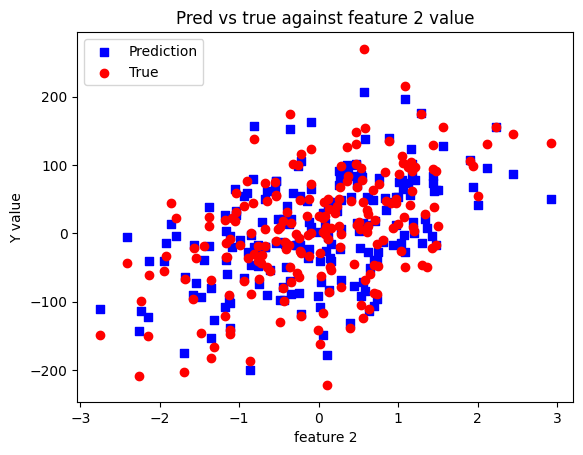

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_test[:,2], y_pred, c='b', marker="s", label='Prediction')
ax1.scatter(X_test[:,2],y_test, c='r', marker="o", label='True')
plt.legend(loc='upper left')
plt.xlabel('feature 2')
plt.ylabel('Y value')
plt.title('Pred vs true against feature 2 value')
plt.show()

3. Repeat the simulation process (part 1 and 2) with the number of feature equal to 10. (15)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 6}
Mean Squared Error: 8392.025269493268


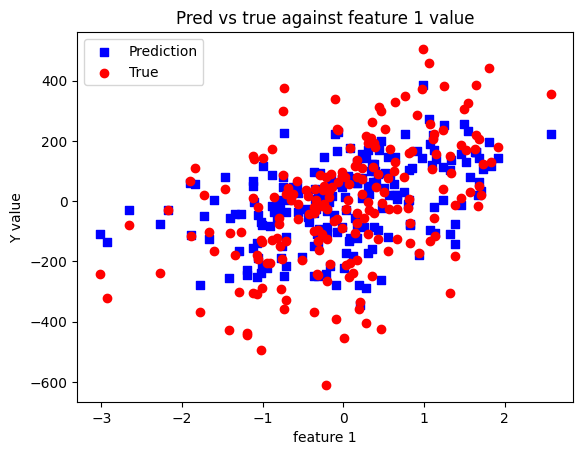

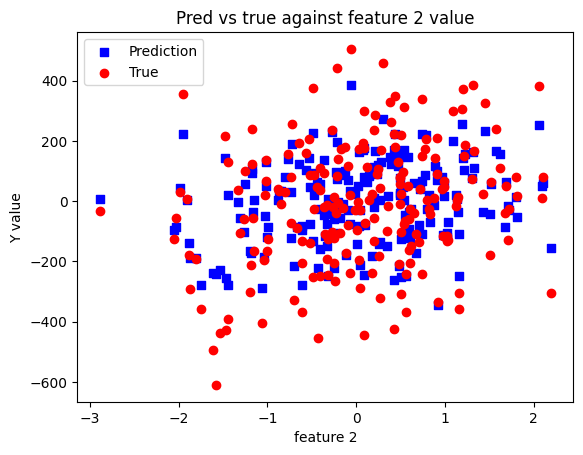

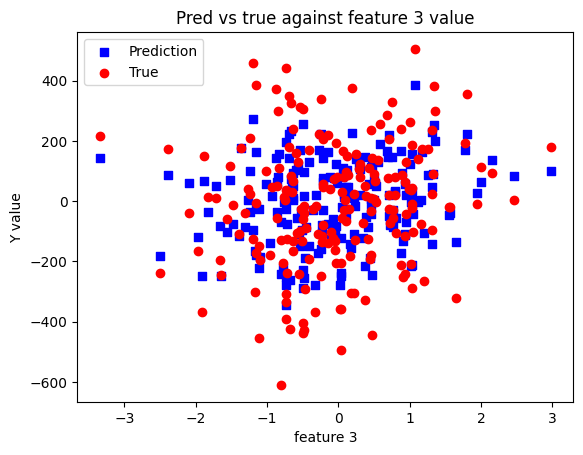

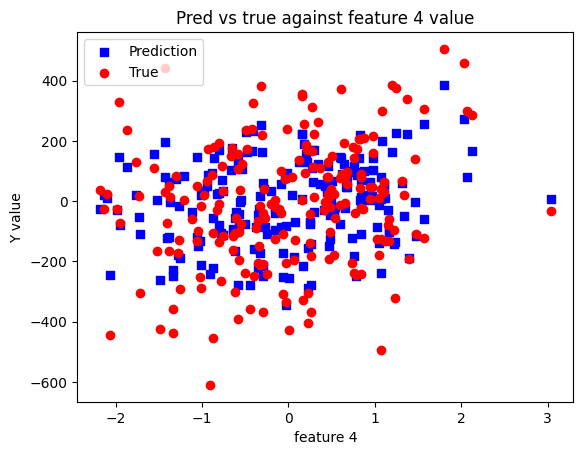

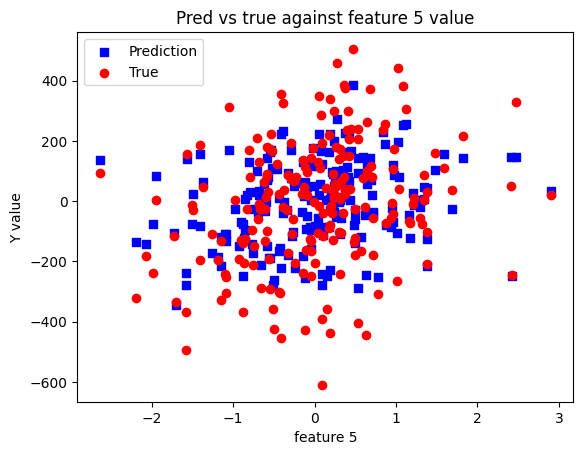

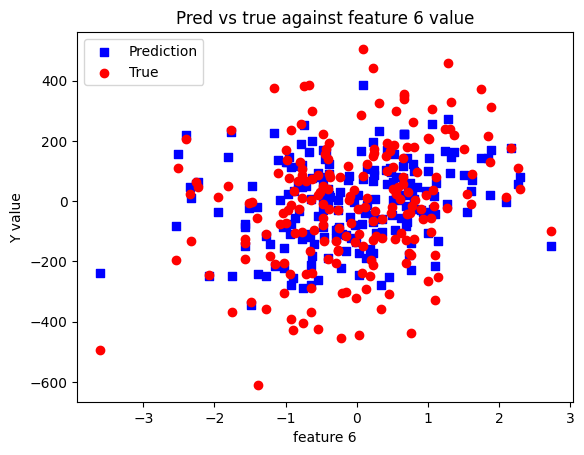

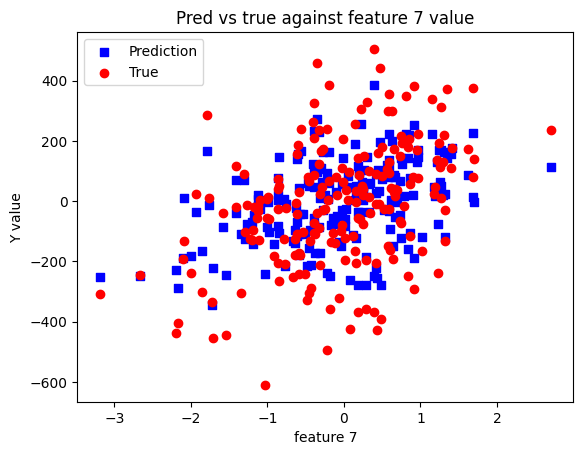

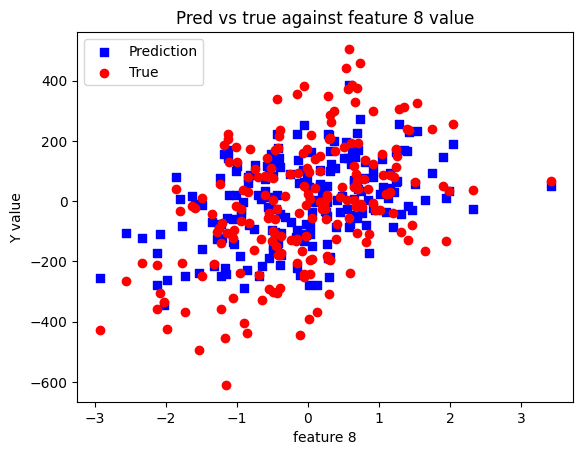

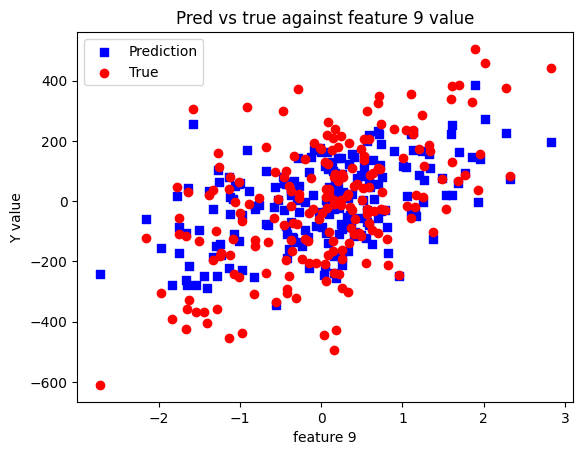

In [77]:
# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)
# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Create the best KNN model with the tuned parameters
knn_best = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
for i in range(1,10):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(X_test[:,i], y_pred, c='b', marker="s", label='Prediction')
    ax1.scatter(X_test[:,i],y_test, c='r', marker="o", label='True')
    plt.legend(loc='upper left')
    plt.xlabel(f'feature {i}')
    plt.ylabel('Y value')
    plt.title(f'Pred vs true against feature {i} value')
    plt.show()

### Question 3: Implement KNN algorithm (40)

In the code demonstration, we show you how to use the KNN function in the sklearn. However, KNN is also easy to implement. Try to complete the the following code to implement the KNN algorithm and verify with the simulaiton data. 

In [78]:
import numpy as np
from collections import Counter
import math
from scipy.spatial import distance

# Define the KNN function
def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for x in X_test:
        # Calculate Euclidean distances between x and all points in X_train
        dis=distance.cdist([x], X_train, 'euclidean')
        # Get indices of k-nearest neighbors
        labels=np.argsort(dis)
        
        # Get the labels of the k-nearest neighbors
        c = [ y_train[i] for i in labels[0,:k]]
        
        # Count the most common label among the nearest neighbors
        y_pred.append(max(set(c), key = c.count))
    return np.array(y_pred)

In [79]:
# Generate random simulation data
np.random.seed(5220)
X = np.random.rand(100, 2)  # 100 data points with 2 features
y = np.random.choice([0, 1], size=100)  # Binary classification labels

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5220)

In [80]:
# Make predictions using KNN
k_value = 5
y_pred=knn_predict(X_train, y_train, X_test, k=k_value)
# Evaluate the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.6333333333333333
